In [15]:
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2
import imutils
import matplotlib.pyplot as plt
import easyocr
%matplotlib inline
import easyocr
print("pakage imported")

pakage imported


In [16]:
im_1_path = "gray_img.jpg"

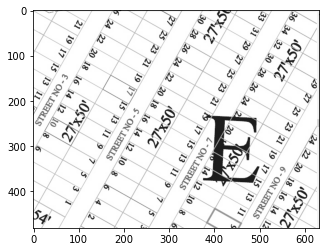

In [17]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [4]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [5]:
result = recognize_text(im_1_path)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\TPL MAPS\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[292, 8], [318, 8], [318, 38], [292, 38]], '0', 0.4235456694002302),
 ([[360, 6], [386, 6], [386, 36], [360, 36]], '&', 0.9990919506549609),
 ([[492, 0], [518, 0], [518, 28], [492, 28]], '&', 0.8942586221858164),
 ([[562, 0], [586, 0], [586, 30], [562, 30]], '&', 0.42626390801446234),
 ([[86, 18], [112, 18], [112, 48], [86, 48]], '4', 0.9706542499521085),
 ([[274, 40], [302, 40], [302, 72], [274, 72]], '4', 0.9999482638375099),
 ([[342, 38], [368, 38], [368, 68], [342, 68]], '4', 0.9993728190882081),
 ([[476, 32], [502, 32], [502, 62], [476, 62]], '~', 0.16184521821662745),
 ([[544, 30], [574, 30], [574, 60], [544, 60]], '~', 0.14873949174050072),
 ([[68, 48], [94, 48], [94, 78], [68, 78]], '6', 0.9991618959541029),
 ([[138, 50], [166, 50], [166, 80], [138, 80]], '4', 0.9886362985082684),
 ([[458, 62], [486, 62], [486, 94], [458, 94]], '&', 0.030195892249341938),
 ([[526, 60], [558, 60], [558, 92], [526, 92]], '4', 0.8236449057237714),
 ([[52, 80], [78, 80], [78, 108], [52, 108]], '

In [6]:
result[0][0]

[[292, 8], [318, 8], [318, 38], [292, 38]]

In [7]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: & (Probability: 1.00)
Detected text: 4 (Probability: 0.97)
Detected text: 4 (Probability: 1.00)
Detected text: 4 (Probability: 1.00)
Detected text: 6 (Probability: 1.00)
Detected text: 4 (Probability: 0.99)
Detected text: 4 (Probability: 1.00)
Detected text: & (Probability: 0.99)
Detected text: 6 (Probability: 1.00)
Detected text: 4 (Probability: 1.00)
Detected text: 4 (Probability: 0.93)
Detected text: 4 (Probability: 1.00)
Detected text: 4 (Probability: 0.95)
Detected text: 4 (Probability: 1.00)
Detected text: 4 (Probability: 1.00)
Detected text: 6 (Probability: 0.99)
Detected text: 6 (Probability: 0.94)
Detected text: 6 (Probability: 1.00)
Detected text: 4 (Probability: 0.92)
Detected text: 6 (Probability: 1.00)
Detected text: 6 (Probability: 0.95)
Detected text: 4 (Probability: 0.92)


<Figure size 432x288 with 0 Axes>

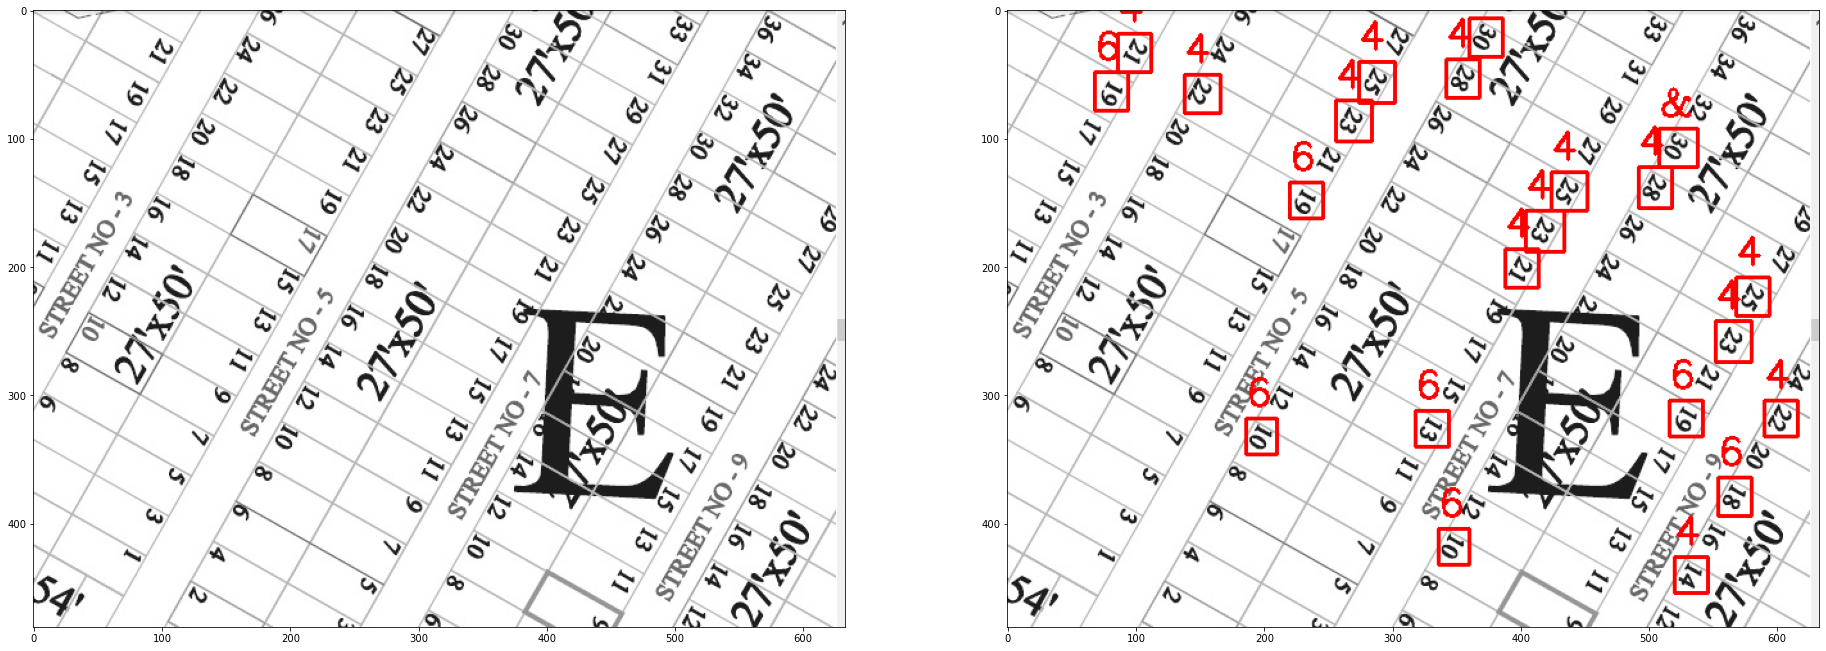

In [8]:
overlay_ocr_text(im_1_path, 'img')

# Rotated image at 15 degree

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[546, 16], [570, 16], [570, 44], [546, 44]], '8', 0.3728943724482292), ([[480, 34], [504, 34], [504, 60], [480, 60]], '8', 0.44082108902054884), ([[538, 48], [562, 48], [562, 76], [538, 76]], '2', 0.144012130814545), ([[355, 75], [375, 75], [375, 101], [355, 101]], '8', 0.9362631170350966), ([[472, 70], [496, 70], [496, 96], [472, 96]], '2', 0.44559876803261034), ([[288, 94], [312, 94], [312, 122], [288, 122]], '4', 0.2657533488609829), ([[528, 82], [554, 82], [554, 112], [528, 112]], '&', 0.2661140212020463), ([[347, 111], [367, 111], [367, 135], [347, 135]], '8', 0.9585819317493502), ([[462, 102], [490, 102], [490, 132], [462, 132]], '8', 0.9931598256281546), ([[518, 116], [544, 116], [544, 146], [518, 146]], '8', 0.9007519230399339), ([[158, 136], [182, 136], [182, 164], [158, 164]], '4', 0.23102485966060815), ([[278, 126], [304, 126], [304, 156], [278, 156]], '4', 0.11517192432508239), ([[336, 144], [360, 144], [360, 174], [336, 174]], '8', 0.6033481064898751), ([[454, 136], [47

<Figure size 432x288 with 0 Axes>

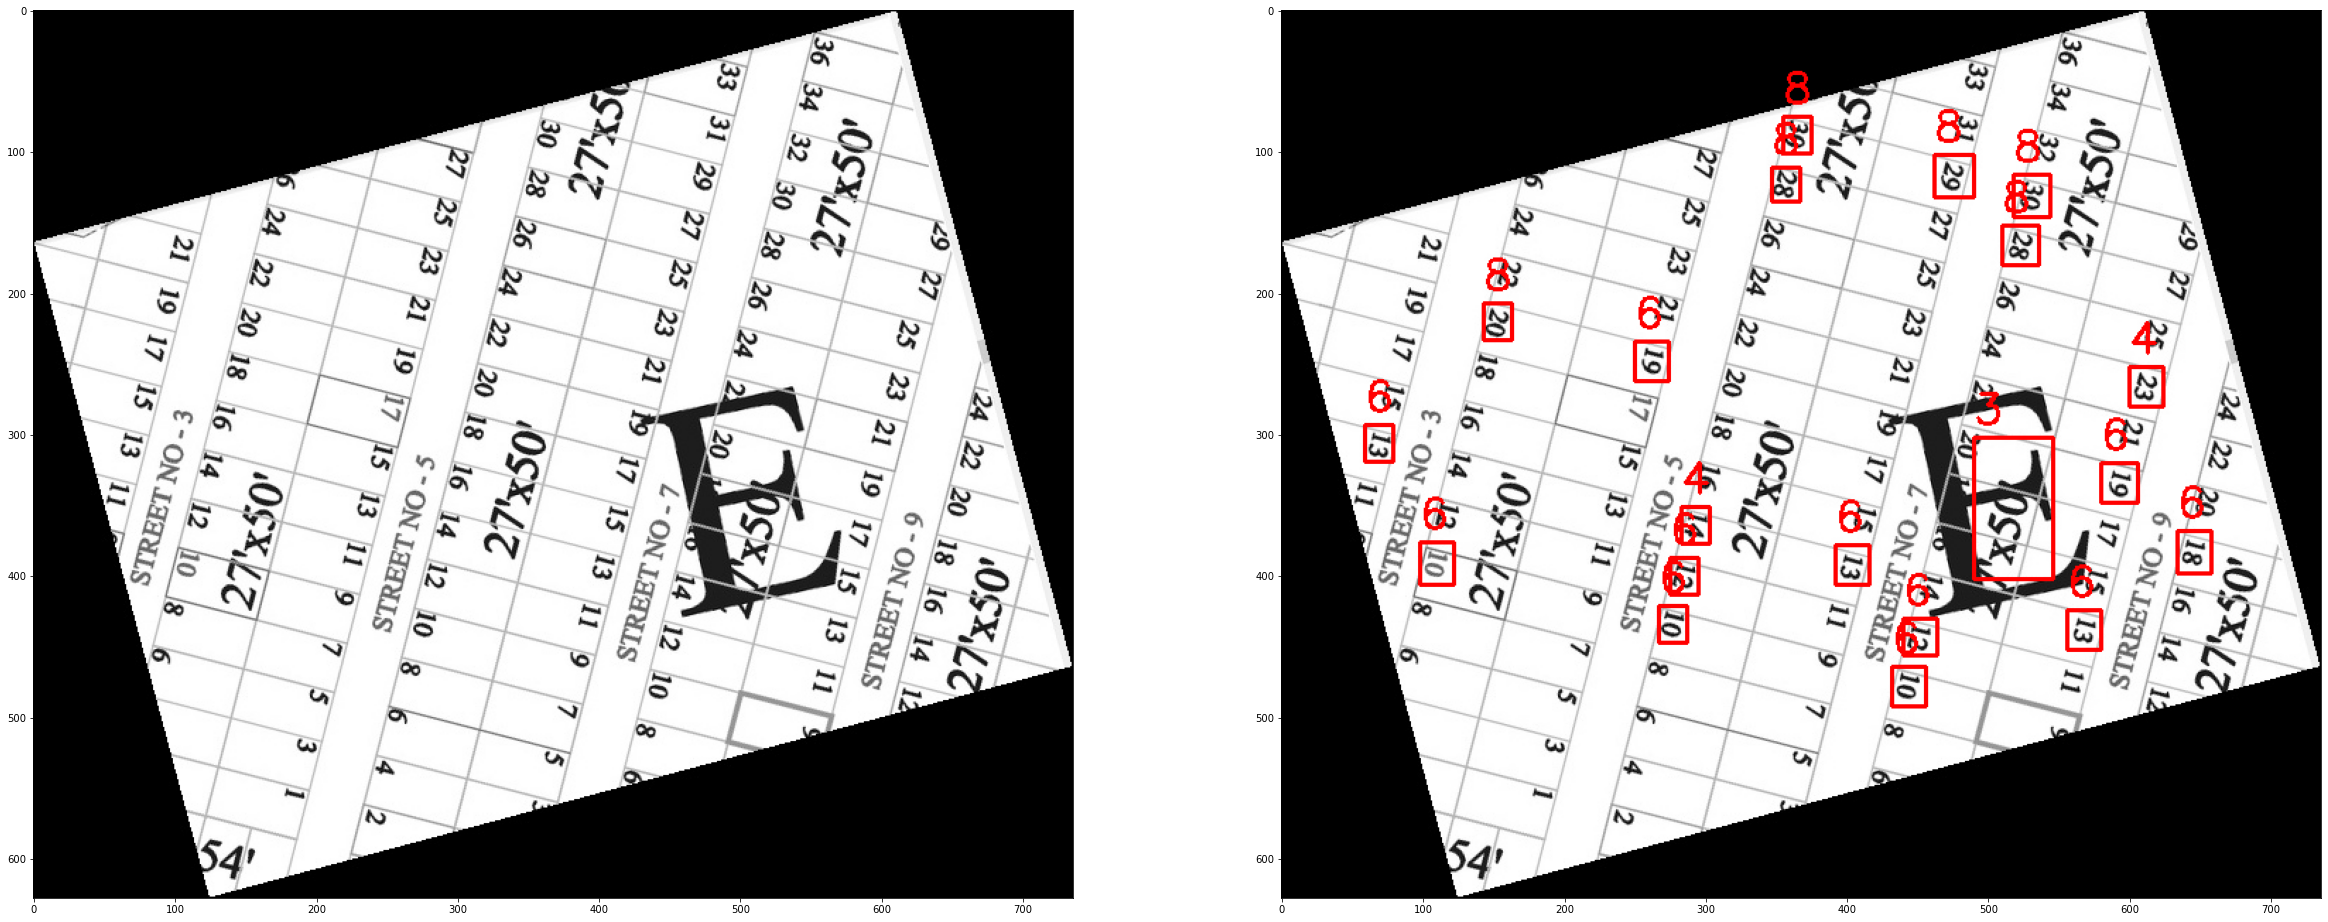

In [9]:
from scipy import ndimage

rotate_15 = ndimage.rotate(img_1, 15)
cv2.imwrite("rotated_15.jpg",rotate_15)
result = recognize_text(rotate_15)
print(result)
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread("rotated_15.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')
    
overlay_ocr_text(rotate_15, 'img')

# Rotated at 30 degree again

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[495, 29], [515, 29], [515, 55], [495, 55]], '8', 0.8088968721355663), ([[435, 63], [455, 63], [455, 89], [435, 89]], '8', 0.8611807422821336), ([[495, 63], [515, 63], [515, 89], [495, 89]], 'X', 0.05287174444902476), ([[437, 101], [457, 101], [457, 127], [437, 127]], '2', 0.6875361153106638), ([[494, 98], [518, 98], [518, 126], [494, 126]], '8', 0.9604880087032974), ([[323, 135], [343, 135], [343, 161], [323, 161]], '8', 0.31168114063436647), ([[352, 108], [384, 108], [384, 190], [352, 190]], '8', 0.9601446746792277), ([[437, 135], [457, 135], [457, 161], [437, 161]], '8', 0.9264376428402556), ([[495, 135], [515, 135], [515, 161], [495, 161]], '8', 0.419783582067371), ([[525, 79], [561, 79], [561, 185], [525, 185]], '3', 0.18697810033394546), ([[325, 171], [345, 171], [345, 197], [325, 197]], '8', 0.9998955753886207), ([[437, 171], [457, 171], [457, 197], [437, 197]], '8', 0.3522581905990627), ([[497, 171], [517, 171], [517, 197], [497, 197]], '8', 0.9990201013893198), ([[611, 169]

<Figure size 432x288 with 0 Axes>

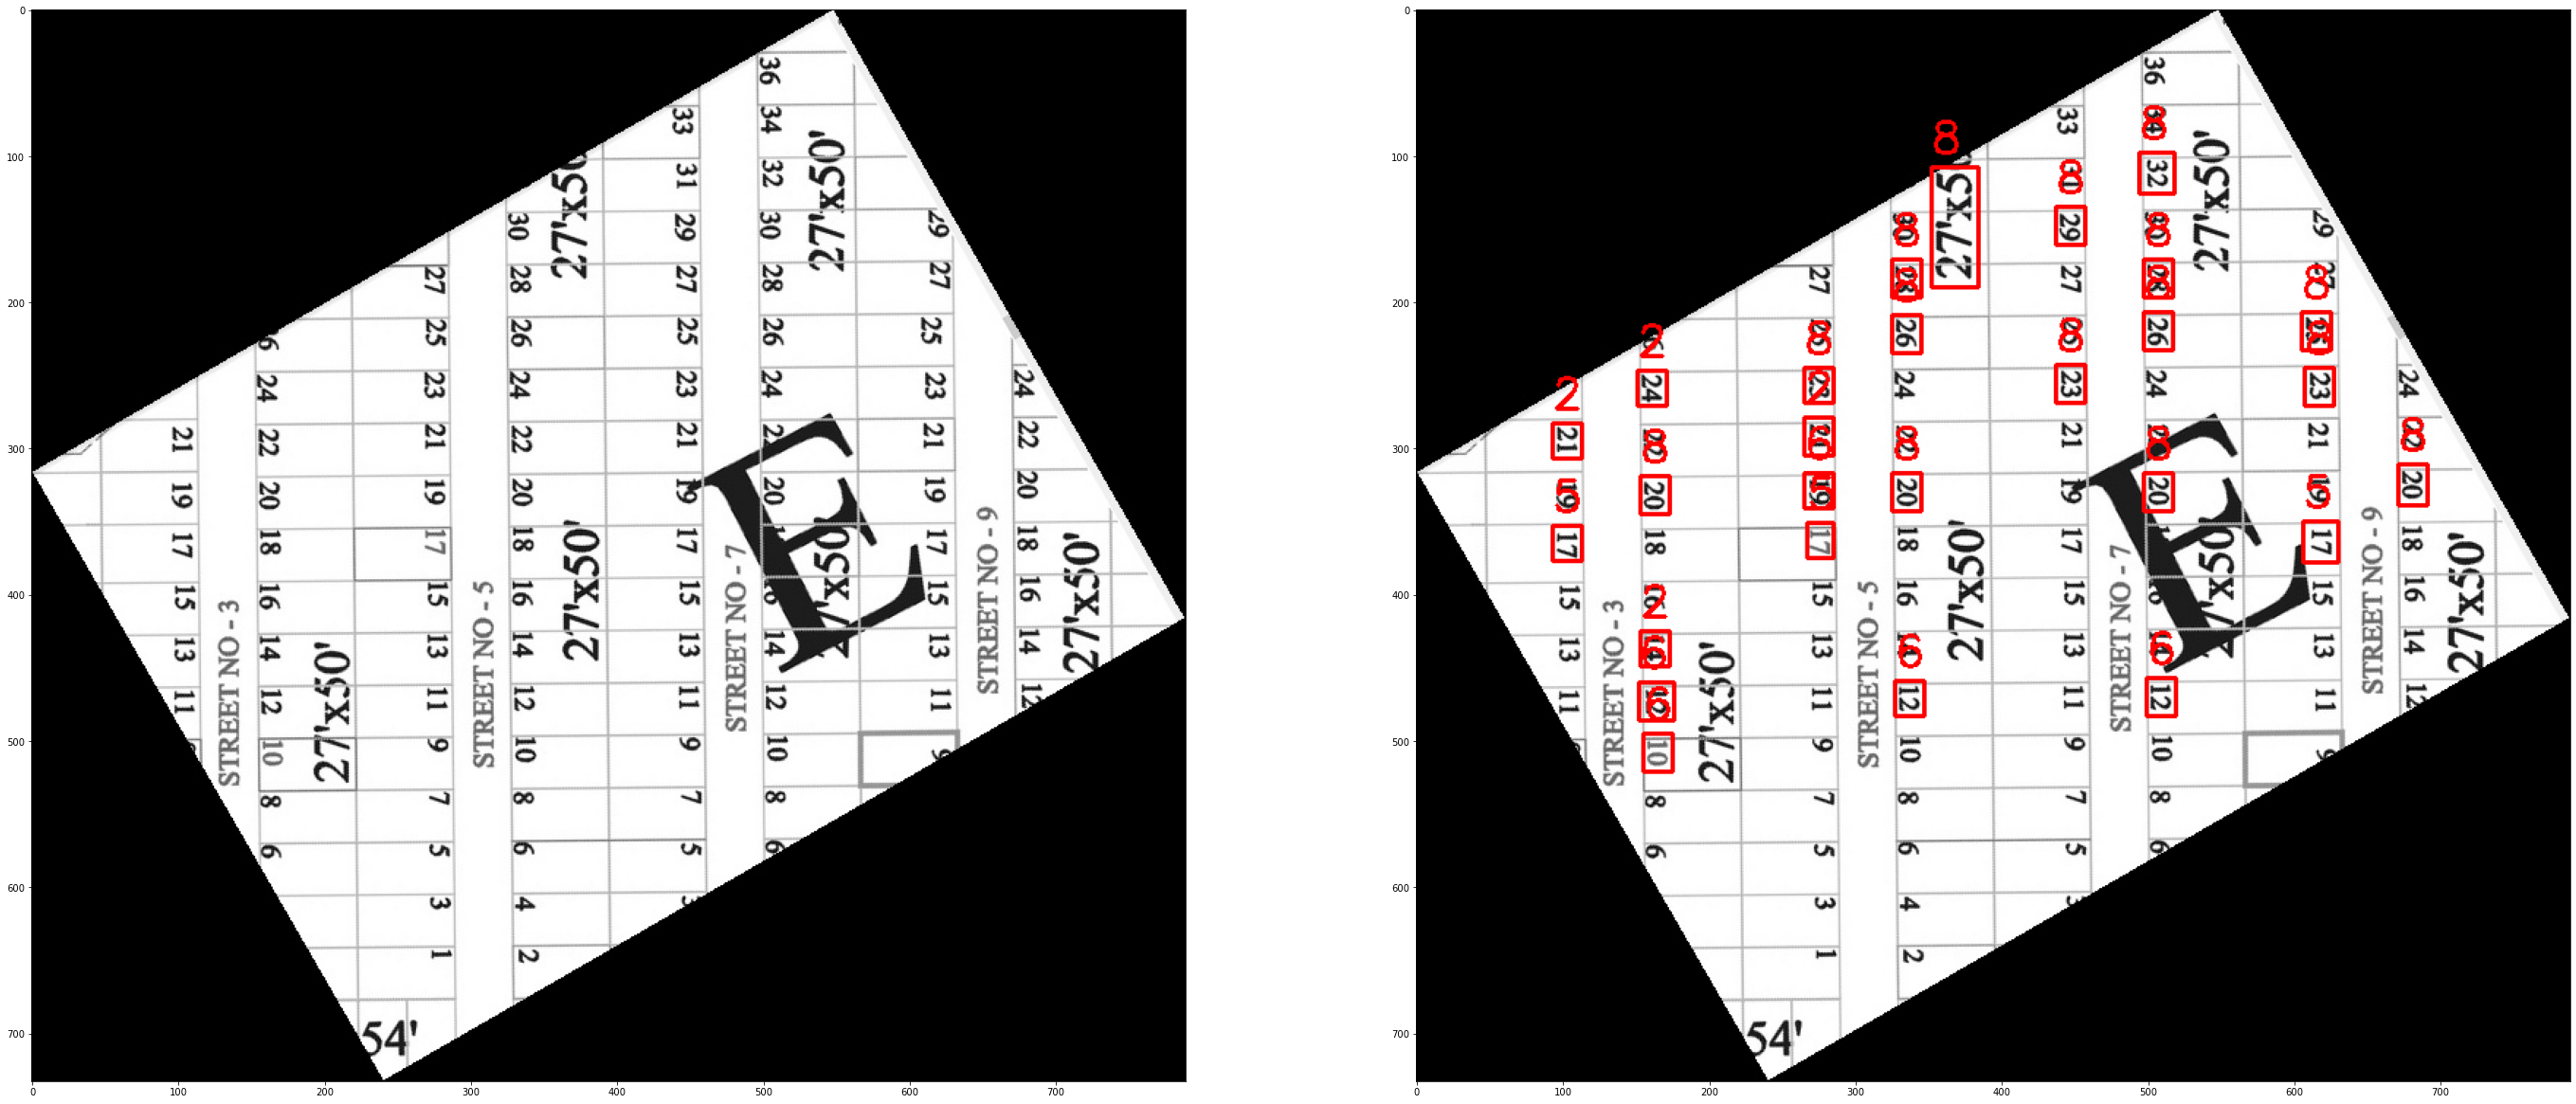

In [11]:
rotate_30 = ndimage.rotate(img_1, 30)
cv2.imwrite("rotated_30.jpg",rotate_30)
result = recognize_text(rotate_30)
print(result)
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread("rotated_30.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')
    
overlay_ocr_text(rotate_30, 'img')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[404, 38], [428, 38], [428, 66], [404, 66]], '5', 0.4095319303185221), ([[415, 71], [435, 71], [435, 97], [415, 97]], 'R', 0.14668732310869714), ([[356, 88], [380, 88], [380, 114], [356, 114]], '8', 0.9701299193789623), ([[424, 106], [448, 106], [448, 134], [424, 134]], '8', 0.9890183576831681), ([[542, 112], [566, 112], [566, 136], [542, 136]], '5', 0.4214970432525469), ([[369, 125], [389, 125], [389, 149], [369, 149]], '2', 0.768795905609295), ([[432, 140], [456, 140], [456, 168], [432, 168]], '8', 0.9748403408717685), ([[553, 145], [573, 145], [573, 169], [553, 169]], '3', 0.4046341978828991), ([[376, 156], [400, 156], [400, 184], [376, 184]], '1', 0.31397749466761127), ([[266, 186], [290, 186], [290, 214], [266, 214]], '8', 0.7435857185362273), ([[387, 191], [407, 191], [407, 217], [387, 217]], '3', 0.2071986984376828), ([[445, 175], [465, 175], [465, 203], [445, 203]], '8', 0.8183240653704758), ([[556, 182], [580, 182], [580, 210], [556, 210]], '8', 0.48486809629402217), ([[455

<Figure size 432x288 with 0 Axes>

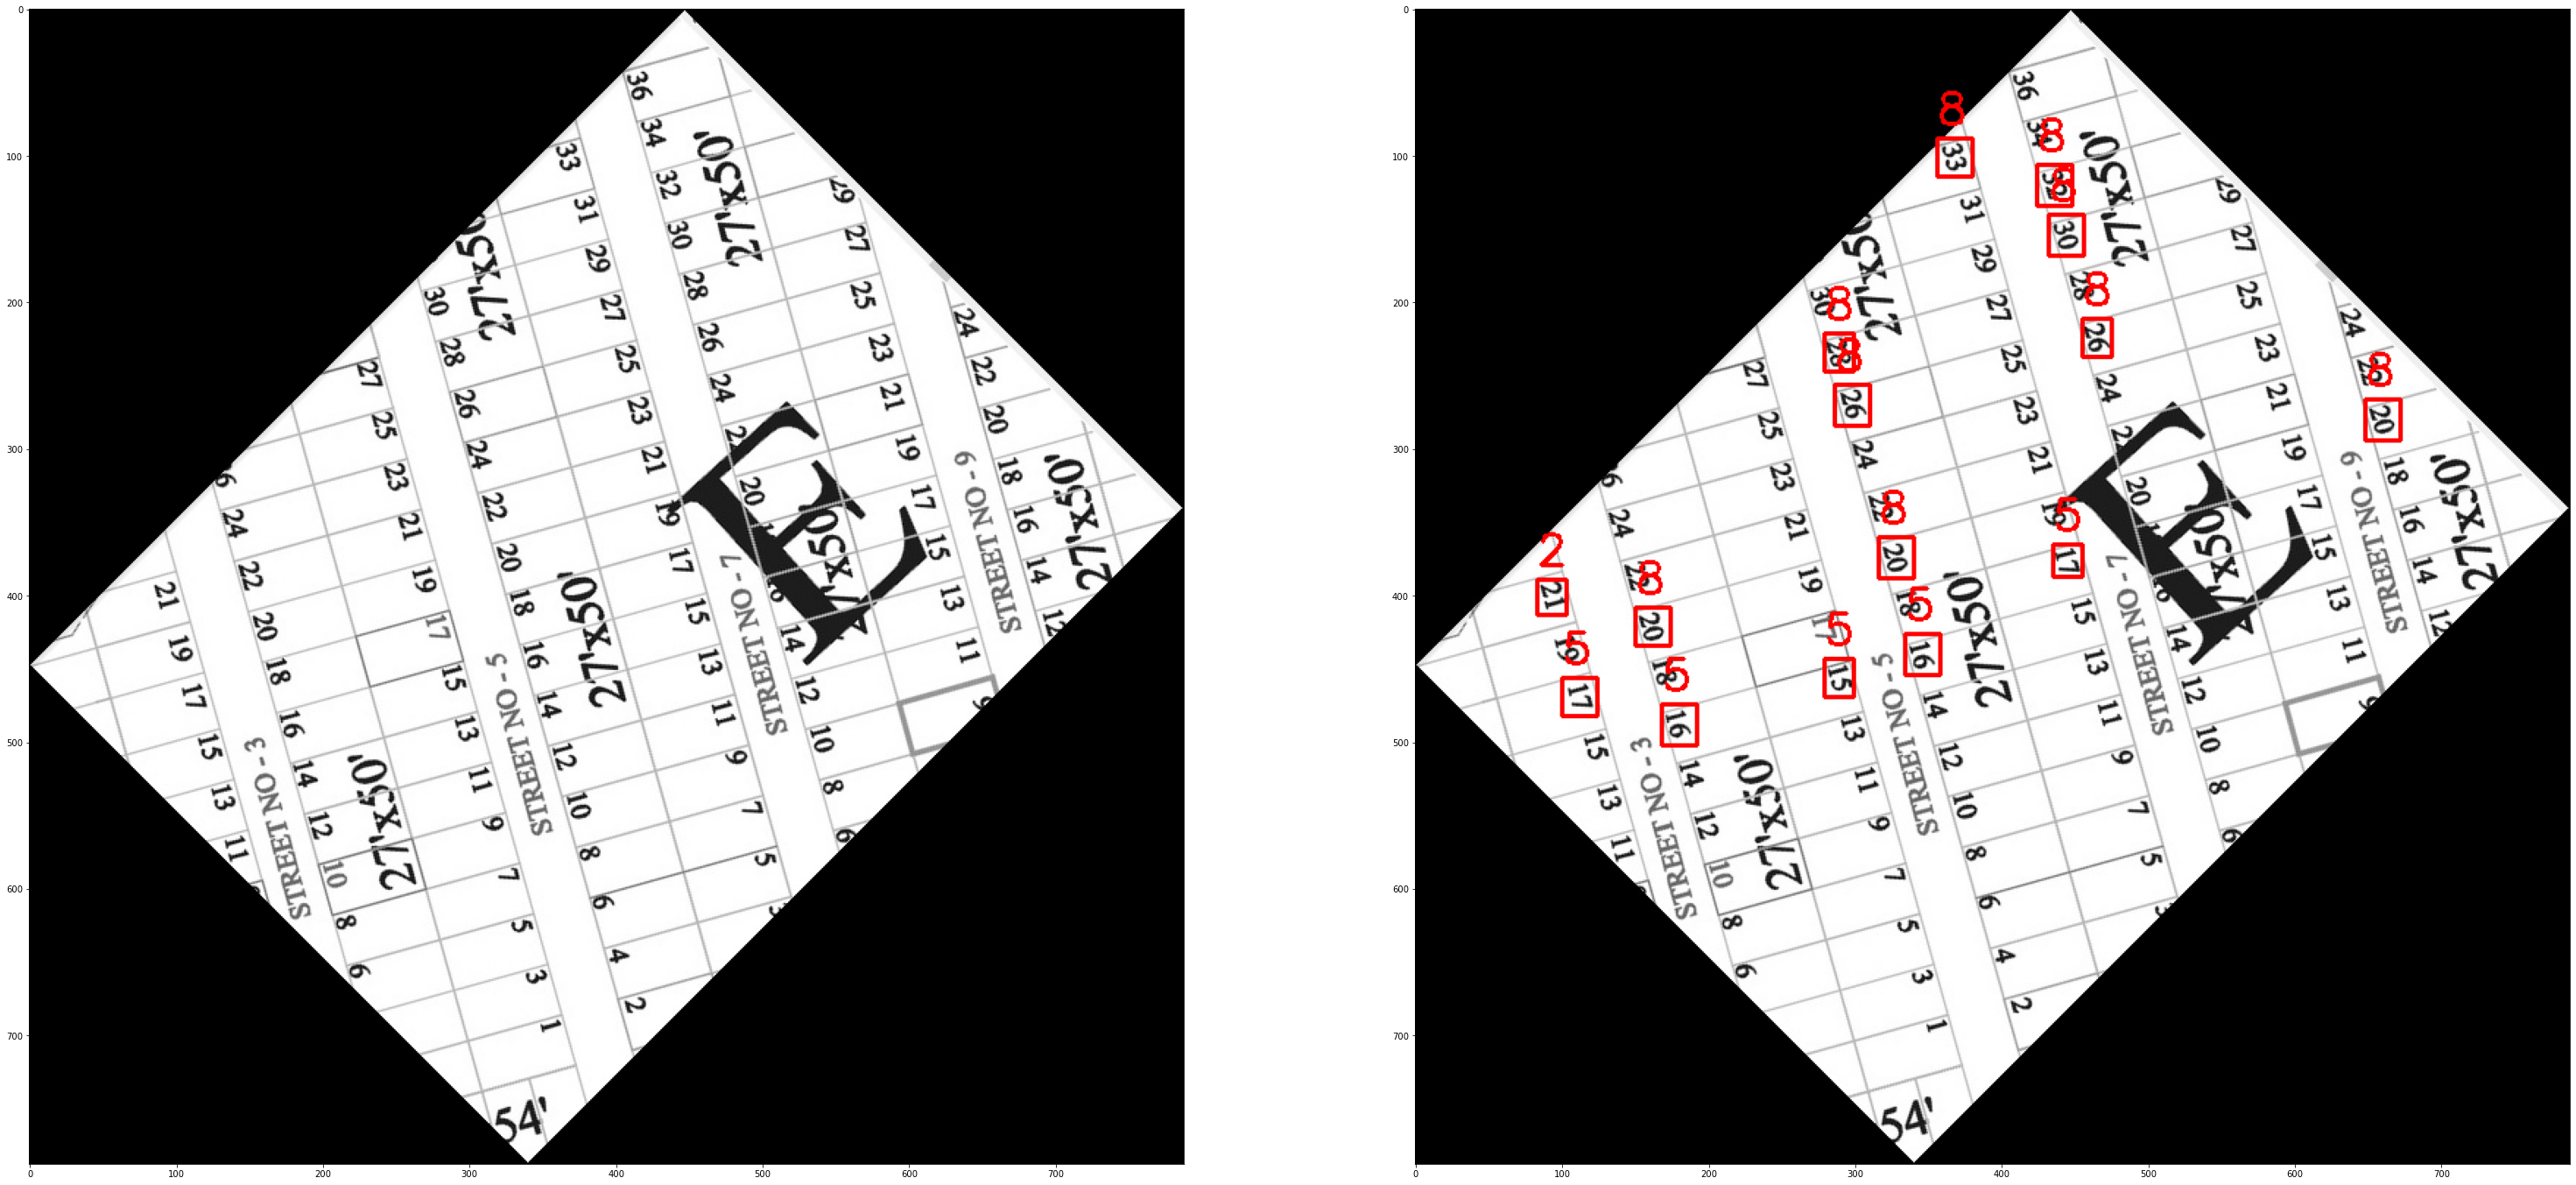

In [12]:
rotate_45 = ndimage.rotate(img_1, 45)
cv2.imwrite("rotated_45.jpg",rotate_45)
result = recognize_text(rotate_45)
print(result)
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread("rotated_45.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')
    
    
overlay_ocr_text(rotate_45, 'img')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[272, 4], [300, 4], [300, 28], [272, 28]], '24', 0.9939921244899166), ([[304, 16], [332, 16], [332, 42], [304, 42]], '22', 0.935380156308109), ([[0, 46], [28, 46], [28, 72], [0, 72]], '36', 0.4057830834180701), ([[210, 38], [238, 38], [238, 64], [210, 64]], '25', 0.6978576783517239), ([[334, 34], [362, 34], [362, 60], [334, 60]], '20', 0.9920000706696004), ([[32, 62], [58, 62], [58, 88], [32, 88]], '34', 0.993597254736522), ([[244, 56], [272, 56], [272, 80], [244, 80]], '23', 0.45256494105211165), ([[366, 52], [394, 52], [394, 78], [366, 78]], 'I8', 0.6524637964273087), ([[62, 78], [90, 78], [90, 106], [62, 106]], '32', 0.8013942017837868), ([[272, 74], [300, 74], [300, 98], [272, 98]], '21', 0.9984104225754051), ([[396, 68], [424, 68], [424, 94], [396, 94]], '16', 0.4866794811931759), ([[92, 98], [120, 98], [120, 124], [92, 124]], '30', 0.9919487727267453), ([[304, 90], [332, 90], [332, 116], [304, 116]], 'I19', 0.3449347492385937), ([[428, 88], [454, 88], [454, 112], [428, 112]], 

<Figure size 432x288 with 0 Axes>

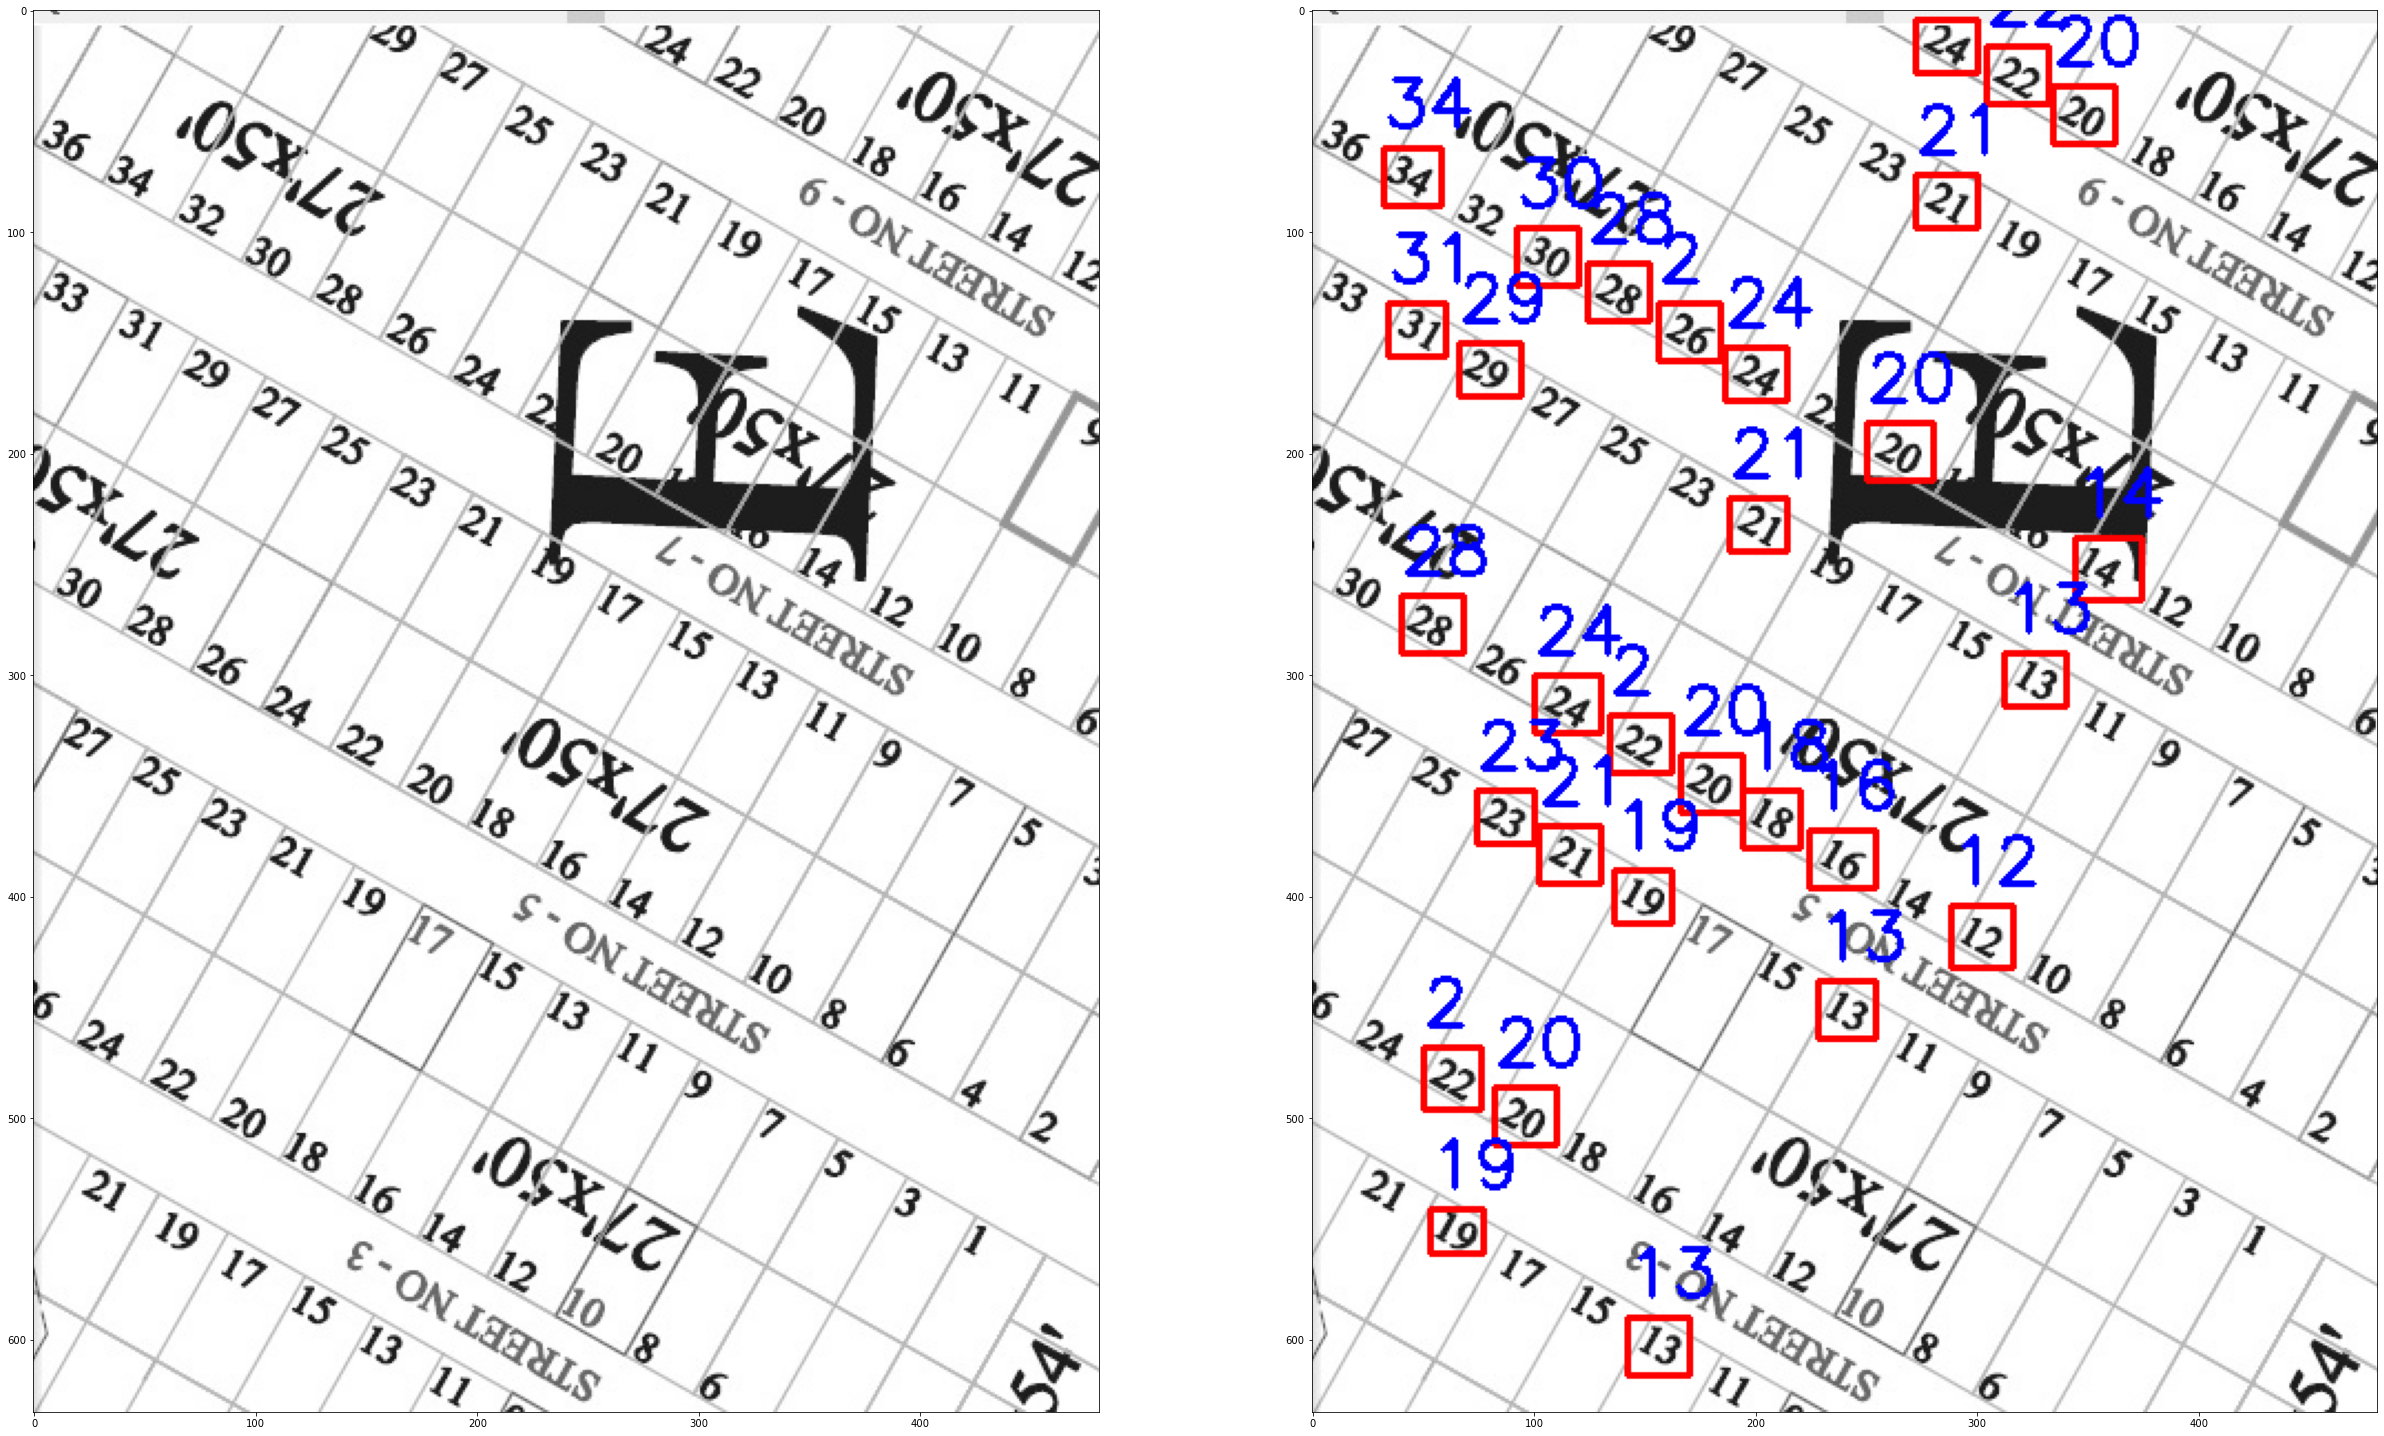

In [14]:
rotate_90 = ndimage.rotate(img_1, 90)
cv2.imwrite("rotated_90.jpg",rotate_90)
result = recognize_text(rotate_90)
print(result)
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread("rotated_90.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0,255), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')
    
overlay_ocr_text(rotate_90, 'img')    

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[269, 55], [293, 55], [293, 75], [269, 75]], '24', 0.9677752896792617), ([[302, 58], [328, 58], [328, 84], [302, 84]], '22', 0.9999976397772992), ([[334, 68], [362, 68], [362, 92], [334, 92]], '20', 0.9998900827885051), ([[149, 87], [173, 87], [173, 103], [149, 103]], '49', 0.6285453114918039), ([[181, 91], [207, 91], [207, 111], [181, 111]], '27', 0.999928421807186), ([[368, 78], [430, 78], [430, 110], [368, 110]], '18_16', 0.5988655541146273), ([[216, 104], [244, 104], [244, 128], [216, 128]], '25', 0.9999103126844037), ([[352, 104], [412, 104], [412, 134], [352, 134]], '6 - ON', 0.9089142720673484), ([[438, 94], [466, 94], [466, 118], [438, 118]], '14', 0.9991617178371374), ([[254, 112], [280, 112], [280, 136], [254, 136]], '23', 0.9999924135756967), ([[286, 122], [312, 122], [312, 146], [286, 146]], '21', 0.9998677457510438), ([[322, 130], [348, 130], [348, 154], [322, 154]], '19', 0.9994276094957976), ([[356, 138], [418, 138], [418, 170], [356, 170]], '17 E5', 0.155440742688420

<Figure size 432x288 with 0 Axes>

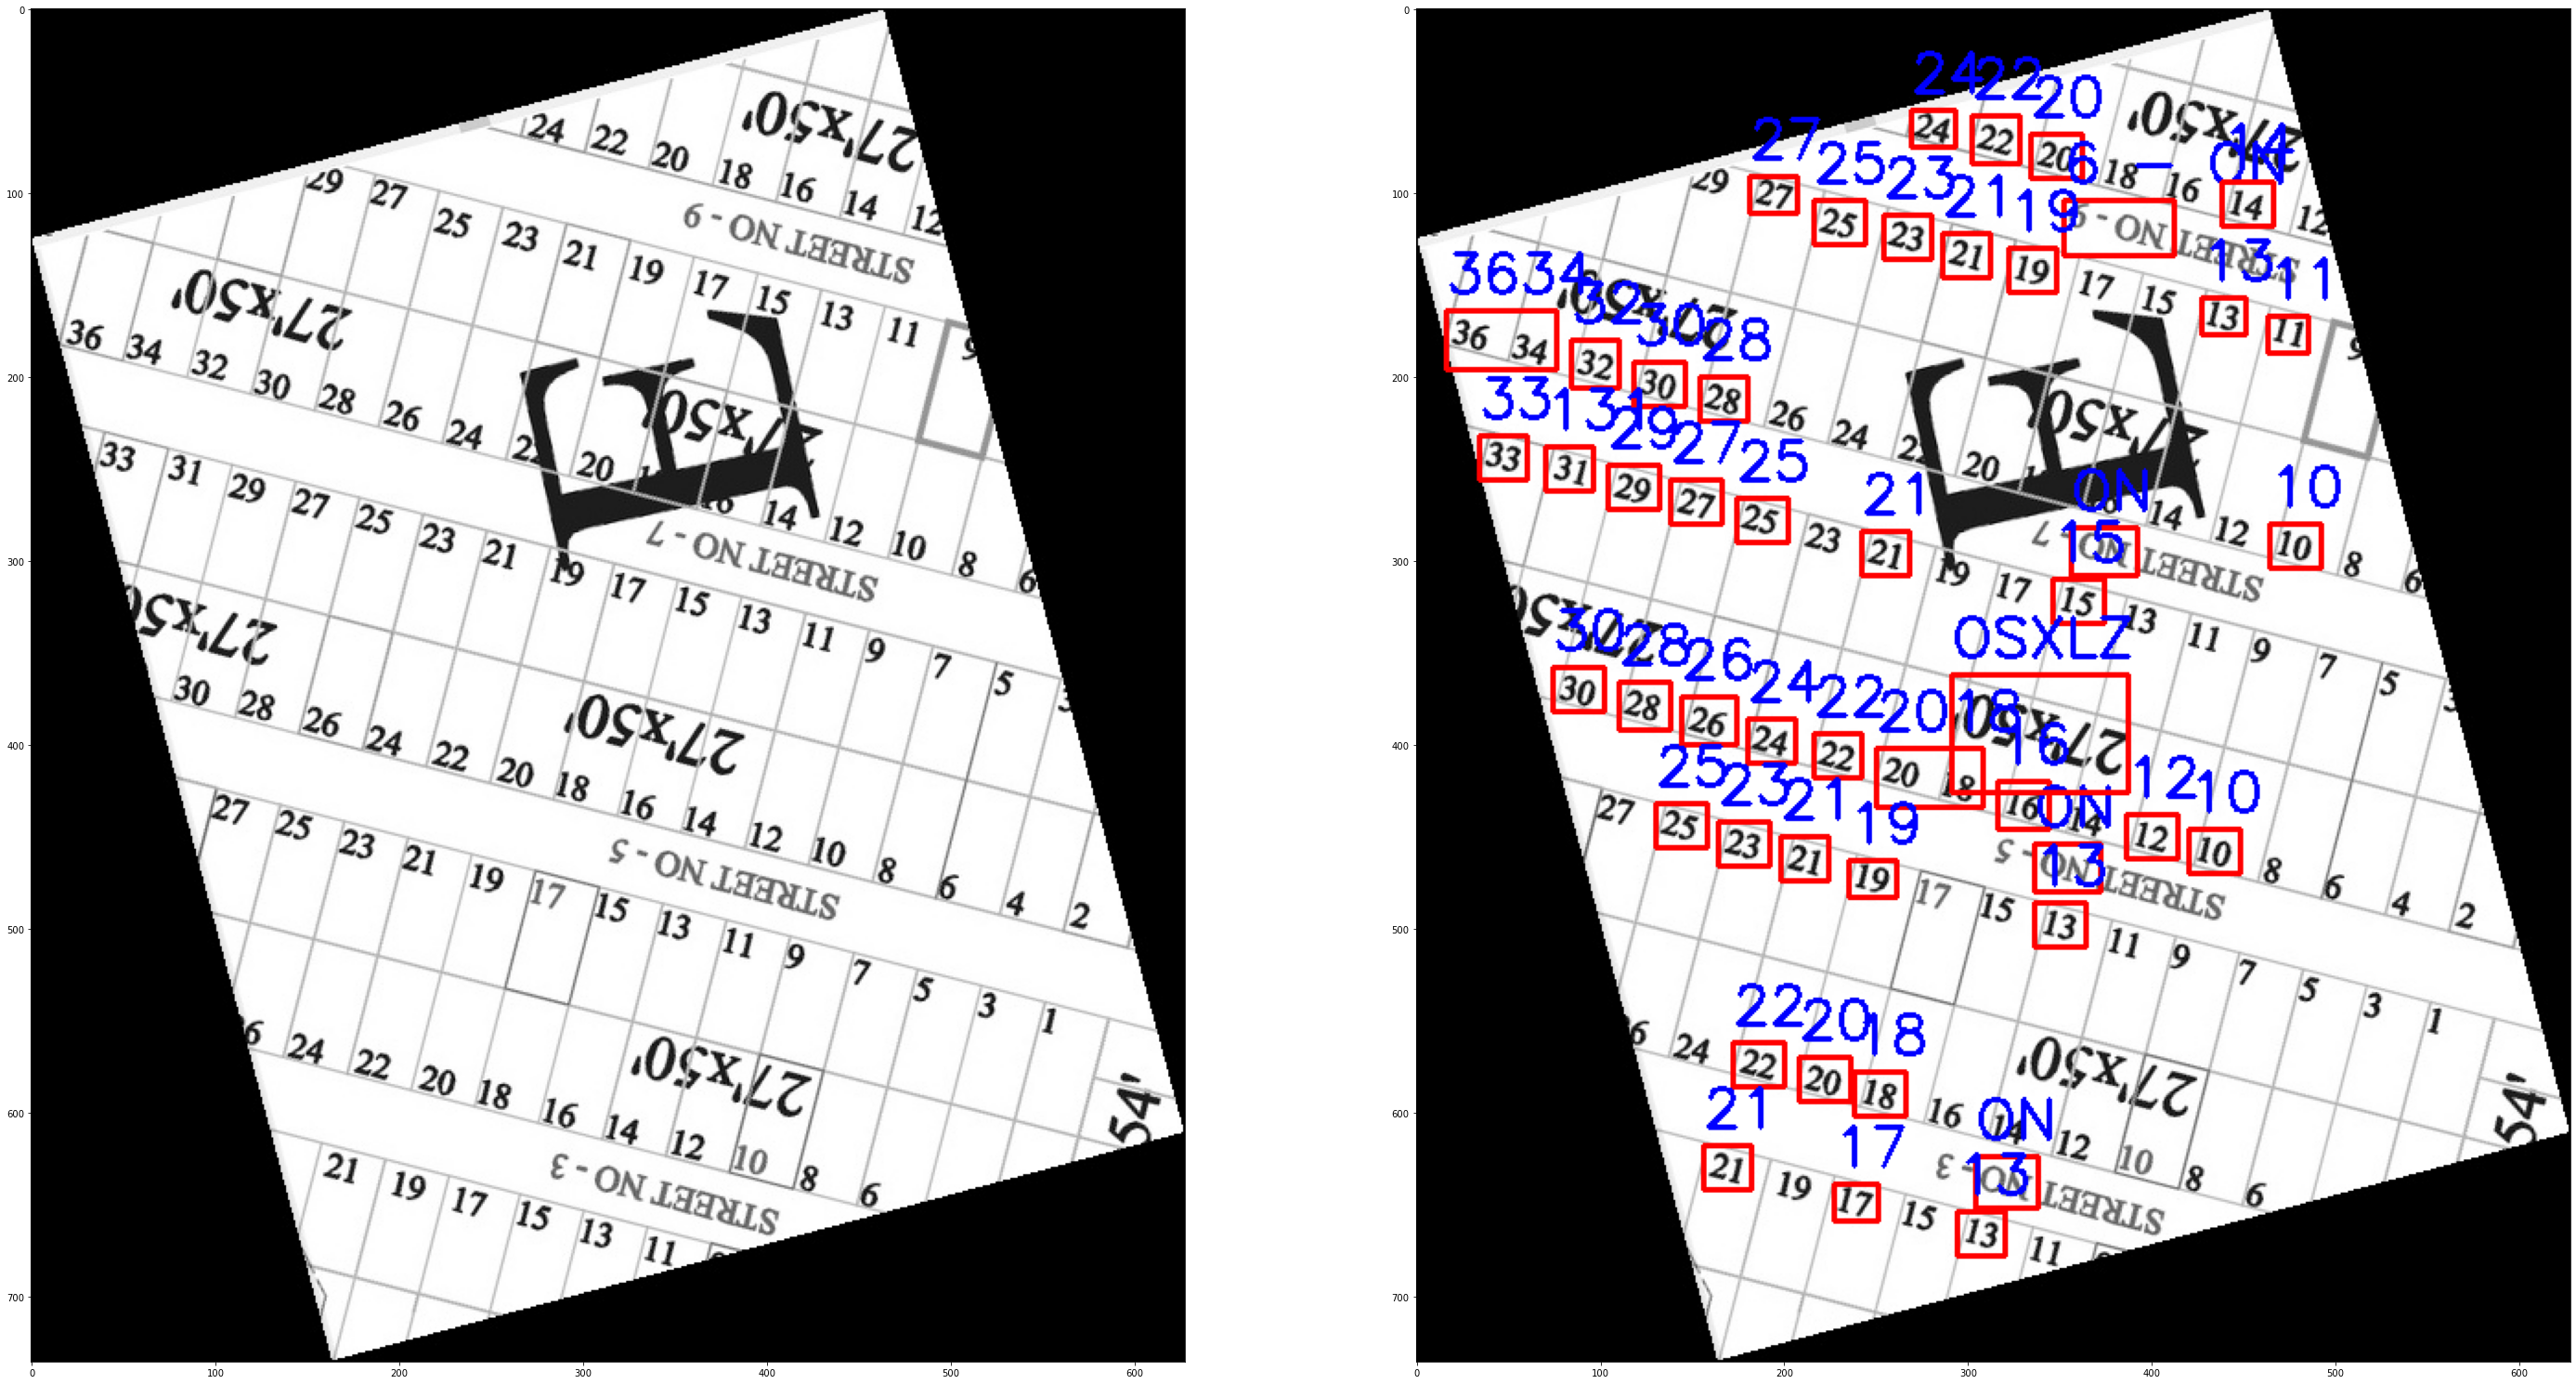

In [18]:
rotate_105 = ndimage.rotate(img_1, 105)
cv2.imwrite("rotated_105.jpg",rotate_105)
result = recognize_text(rotate_105)
print(result)
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread("rotated_105.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0,255), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')
    
overlay_ocr_text(rotate_105, 'img')    

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[263, 71], [287, 71], [287, 91], [263, 91]], '24', 0.9999942186589443), ([[296, 70], [322, 70], [322, 96], [296, 96]], '22', 0.9999981455391691), ([[330, 78], [358, 78], [358, 102], [330, 102]], '20', 0.9993388913840475), ([[364, 84], [392, 84], [392, 108], [364, 108]], '18', 0.4043782448457267), ([[400, 88], [428, 88], [428, 112], [400, 112]], '16', 0.999977409363936), ([[434, 94], [462, 94], [462, 118], [434, 118]], '14', 0.9836100339889526), ([[143, 111], [169, 111], [169, 129], [143, 129]], '29', 0.9951704438210282), ([[179, 113], [205, 113], [205, 133], [179, 133]], '27', 0.9999996628252286), ([[352, 112], [410, 112], [410, 140], [352, 140]], '6 - ON', 0.7321805556361387), ([[214, 124], [242, 124], [242, 148], [214, 148]], '25', 0.9999518686382699), ([[252, 128], [280, 128], [280, 152], [252, 152]], '23', 0.9999949423819248), ([[287, 137], [311, 137], [311, 157], [287, 157]], '21', 0.9999765664326473), ([[323, 143], [347, 143], [347, 163], [323, 163]], '19', 0.9999855015148964)

<Figure size 432x288 with 0 Axes>

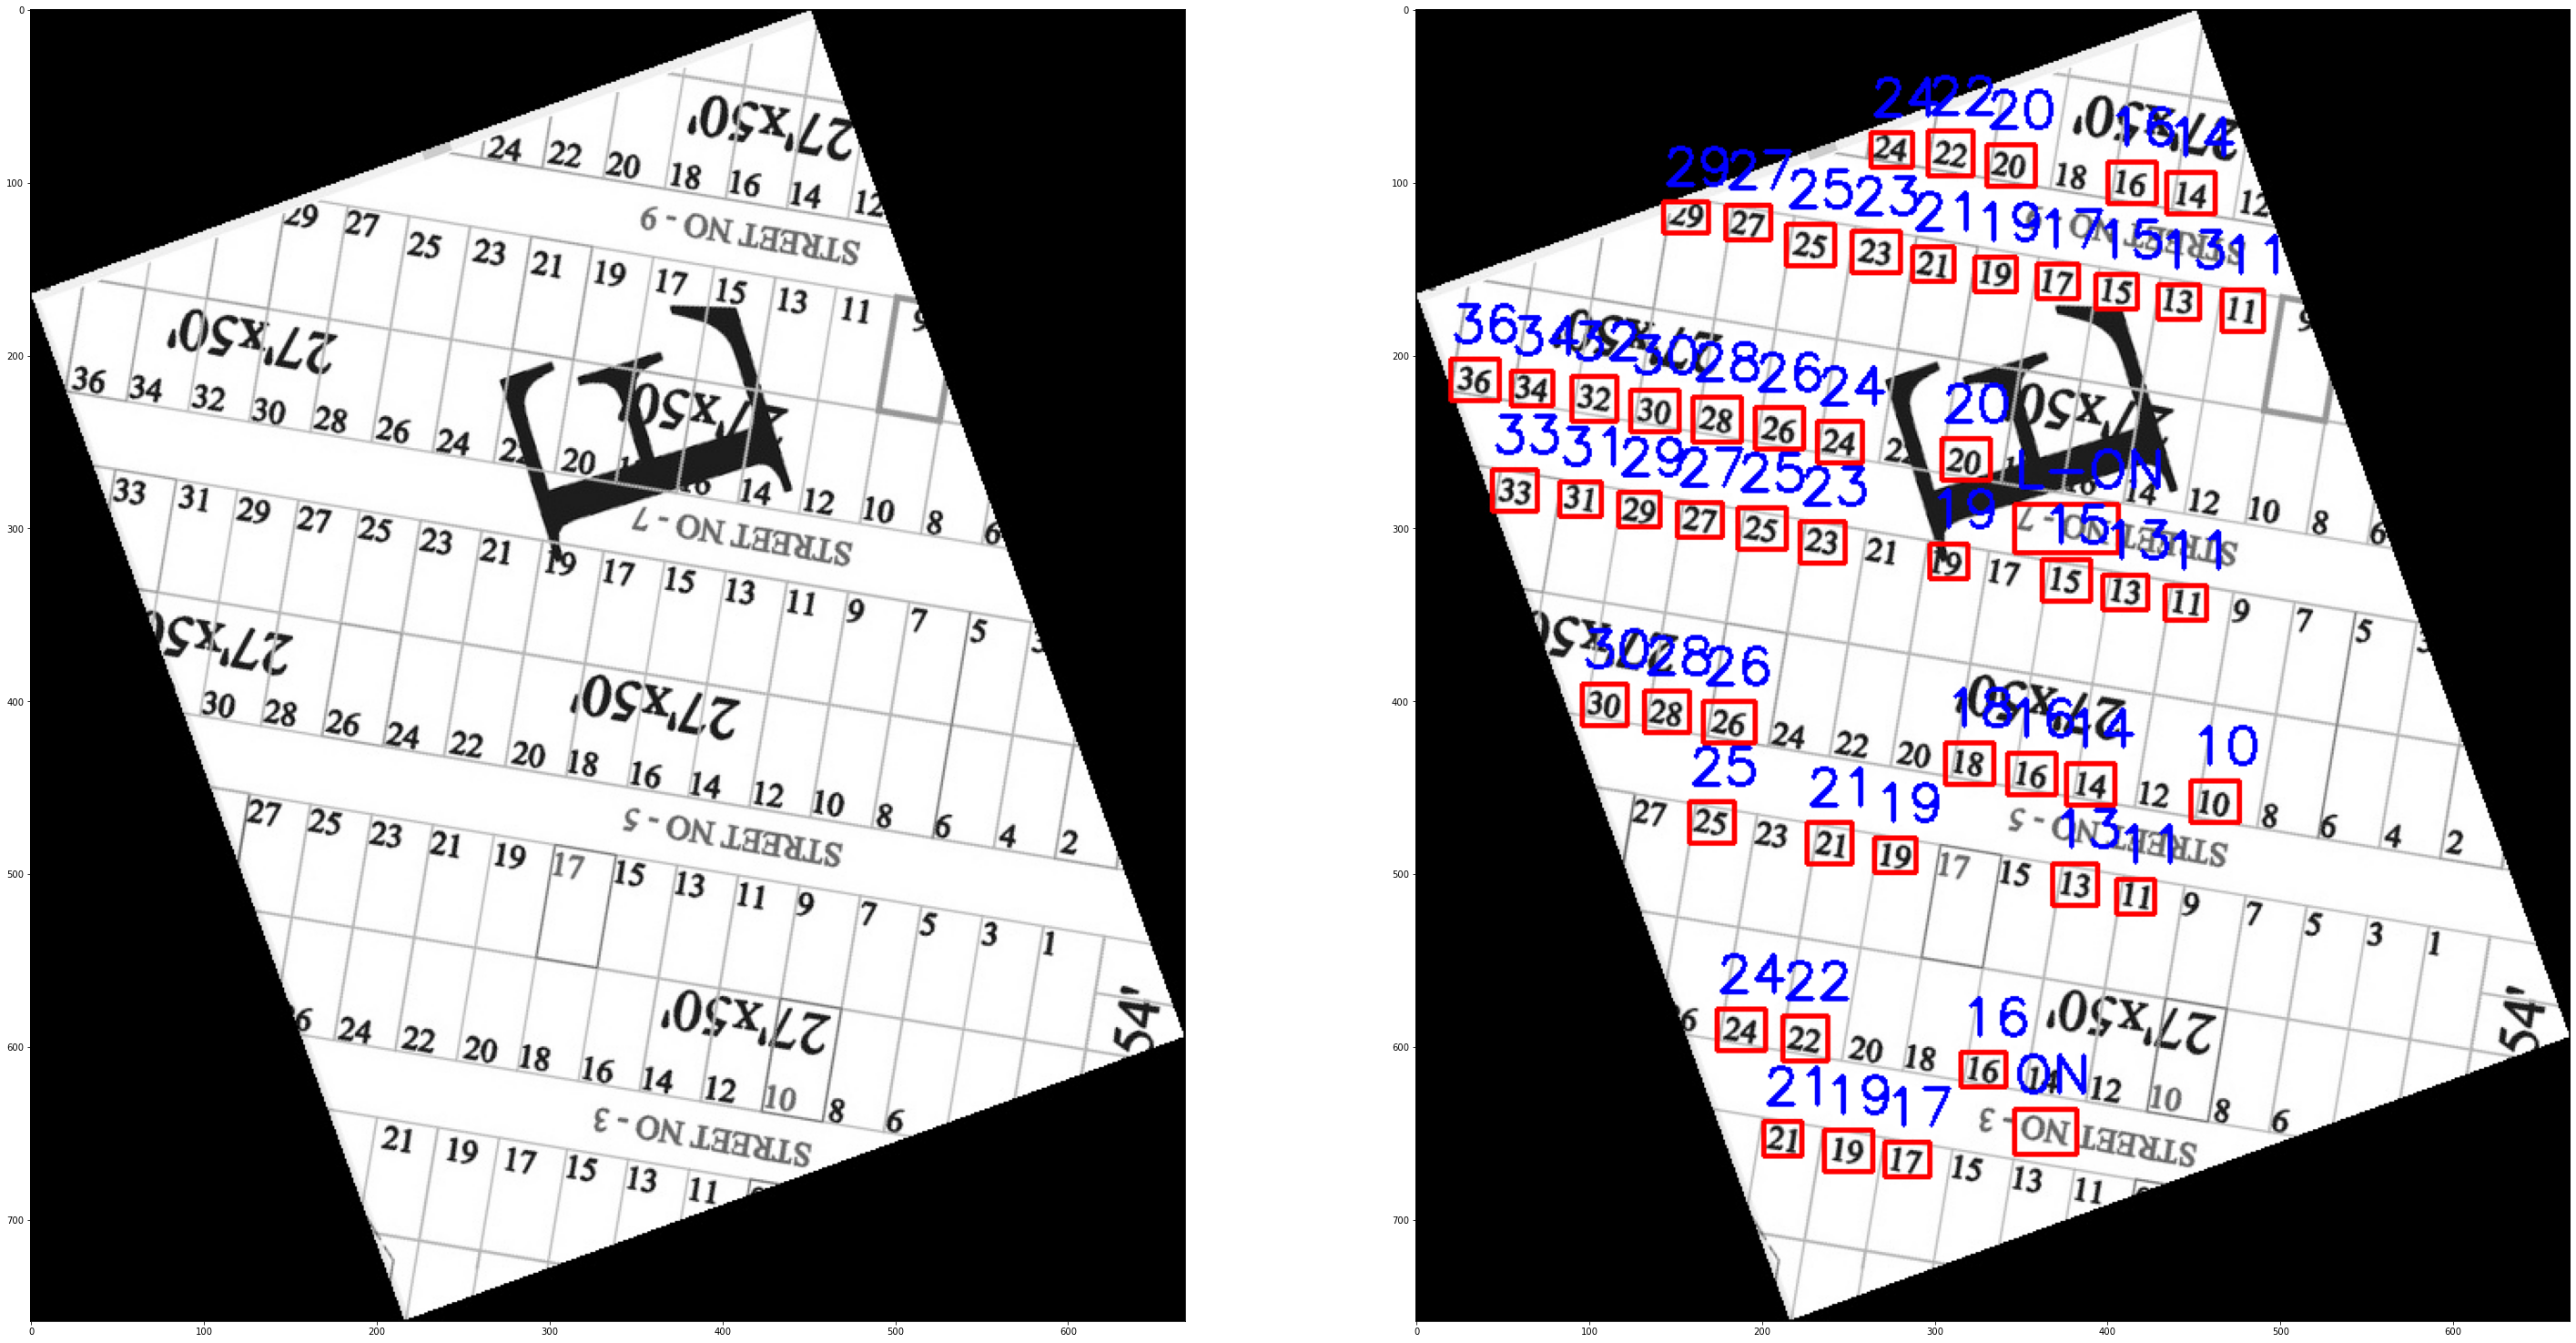

In [19]:
rotate_110 = ndimage.rotate(img_1, 110)
cv2.imwrite("rotated_110.jpg",rotate_110)
result = recognize_text(rotate_110)
print(result)
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread("rotated_110.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 15
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.0.2, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.90:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=2)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0,255), thickness=2)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig("testing", bbox_inches='tight')
    
overlay_ocr_text(rotate_110, 'img')    